In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
import statsmodels.tools as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

# 1. Read the dataset

In [2]:
data=pd.read_excel("Telecom_Churn.xls")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [4]:
# as our column names contain spaces let's replace them with _
data.columns = data.columns.str.replace(" ", "_")

In [5]:
data.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [6]:
#Customer phone number is a unique number, so it can be kept setting to index(also it will be droped)
data.set_index(keys="Phone", inplace=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 382-4657 to 400-4344
Data columns (total 20 columns):
Account_Length    3333 non-null int64
VMail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l_Plan        3333 non-null int64
VMail_Plan        3333 non-null int64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 546.8+ KB


In [8]:
data.describe()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


# 2. Check whether there are any missing values/duplicates or not, and if yes, deal with them accordingly.

# 3.Check whether there are any variables that have only one value and remove them if any.

In [9]:
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


#### there is no duplicates, missing values and single valued columns in our data

# 4. Check whether you have correlated features or not, and if yes, deal with them accordingly.

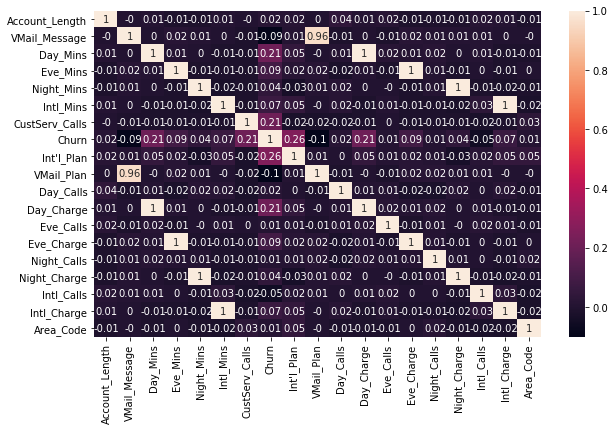

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr().round(2),annot=True)
plt.show()

#### as we see there is high correlation between VMail Plan and VMail Message. Also we have very high correlation between Day Charge and Day Mins, Eve Charge and Eve Mins, Night Charge and Night Mins, Intl Charge and Intl Mins(which is obviouse as the rate per part of the day is fixed; the more you talk in minutes, the more you will be charged)

# 5. Do some descriptive analysis (visualizations), which may help to improve the model afterwards.

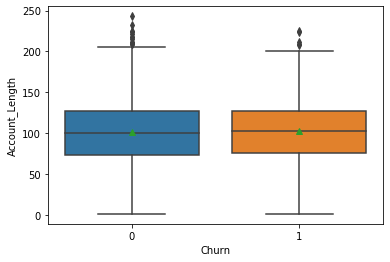

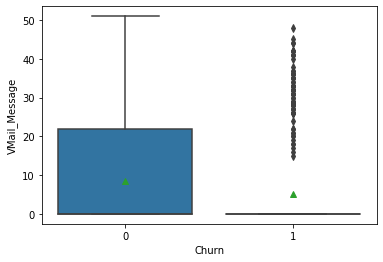

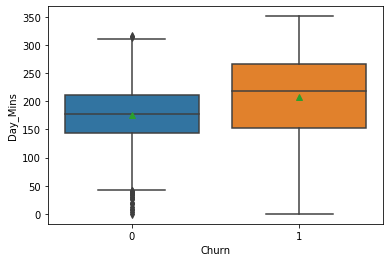

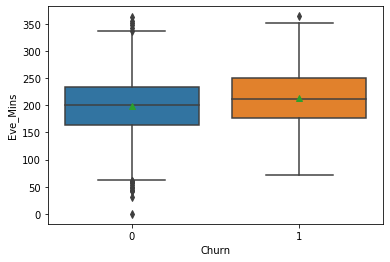

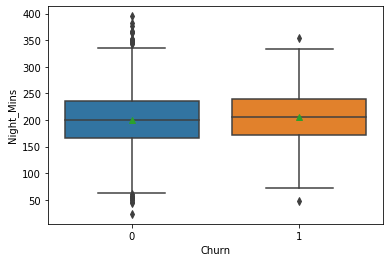

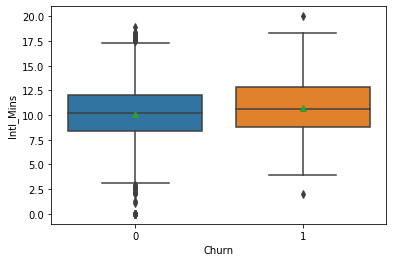

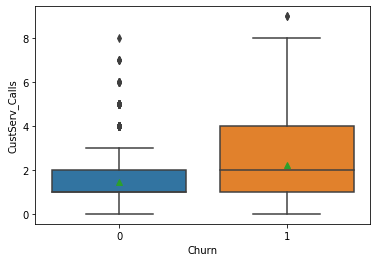

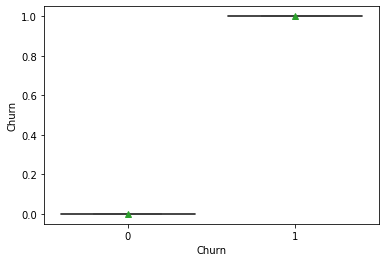

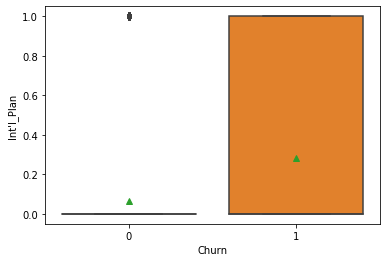

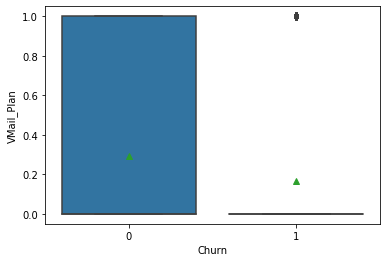

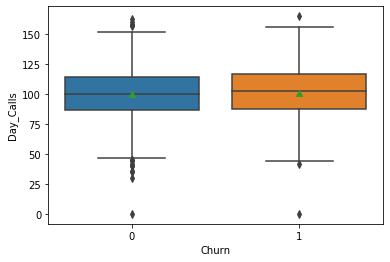

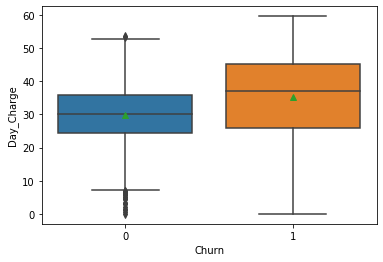

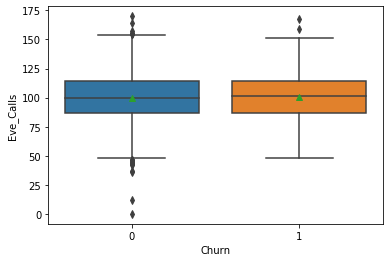

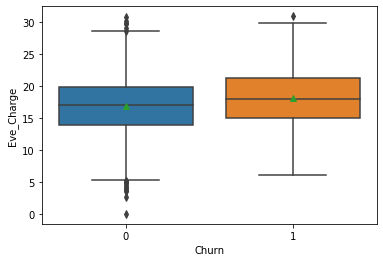

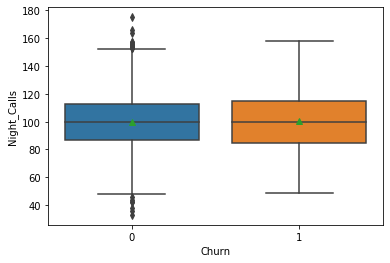

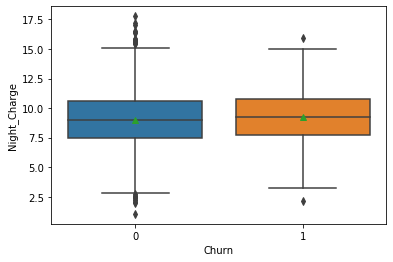

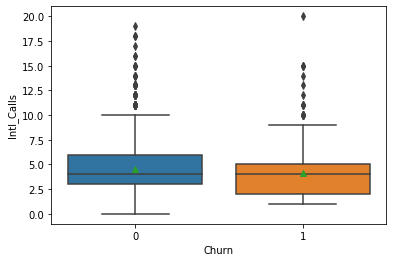

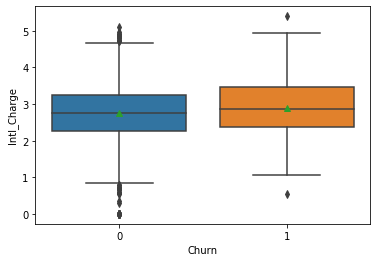

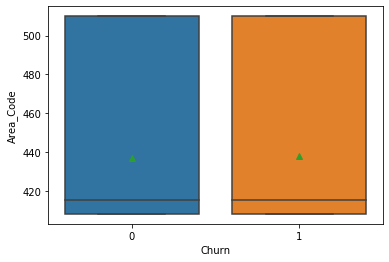

In [11]:
#Let's also see whether mean Final grade differs by any of the categorical variables useing boxplot
for i in data.dtypes[data.dtypes!="O"].index.tolist():
    sns.boxplot(data=data,y=i,x="Churn", showmeans=True)
    plt.show()

####  We can clearly see that number of times customers calls to custom service do affect Churn. Plot indicates, that the means of CustServ_Calls for churned and not churned customers differ, hence we can keep that variable.. those of Day_Charge, Day_Call, Night_Charge, Night_Call.. are also different. 
#### The length boxes for Account_lenghth are slightly different, that is why I have desided not to drop it.

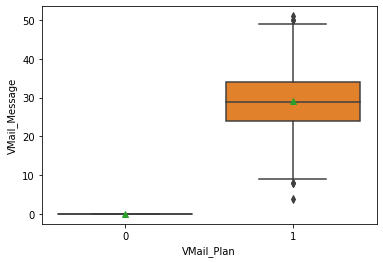

In [13]:
sns.boxplot(data=data,y="VMail_Message",x="VMail_Plan", showmeans=True)
plt.show()

#### here we can conclude that consumers without VMail_Plan  has no messages, that is why these two variables are correlated so we can drop VMail_Message

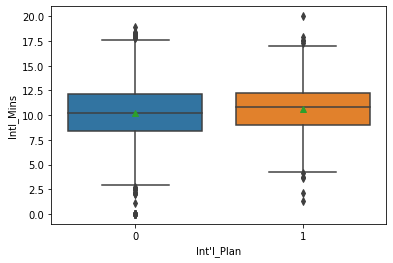

In [14]:
sns.boxplot(data=data,y="Intl_Mins",x="Int'l_Plan", showmeans=True)
plt.show()

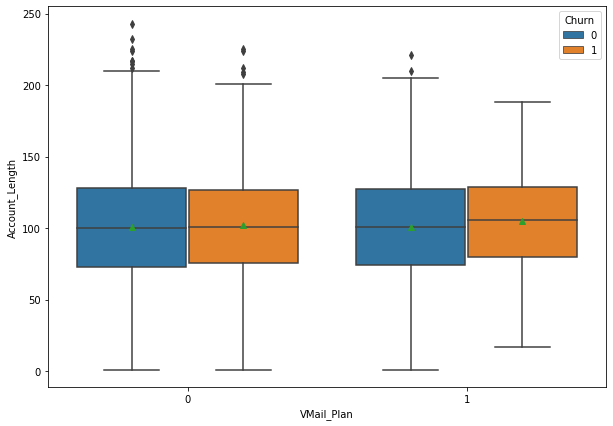

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,y="Account_Length",x="VMail_Plan",hue=data.Churn,  showmeans=True)
plt.show()

In [16]:
#creating churn rate for each VMail_Plan and Int'l_Plan types
rates_list=[]
rates1=data.groupby("Int'l_Plan")["Churn"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()
rates2=data.groupby("VMail_Plan")["Churn"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()
rates_list.append(rates1)
rates_list.append(rates2)

In [17]:
rates_list[1]

,VMail_Plan,Churn,percentage
0,0,0,83.284944
1,0,1,16.715056
2,1,0,91.323210
3,1,1,8.676790


#### the percentage of costomer churn is higher among customers without VMail_Plan

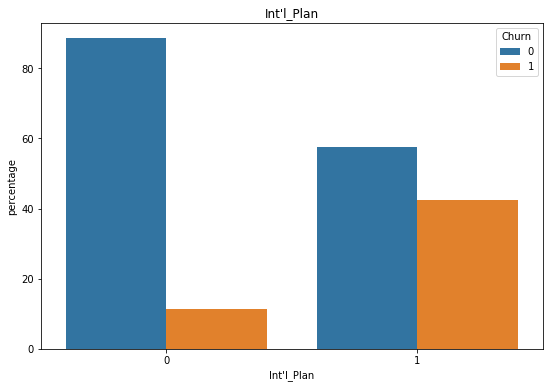

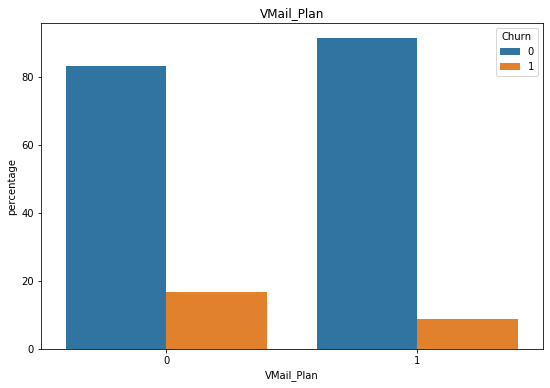

In [18]:
#creating barplots showing percentage distribution of churn by each category
for i in rates_list:
    plt.figure(figsize=(9,6))
    sns.barplot(x=i.iloc[:,0], y=i.iloc[:,2], hue=i.iloc[:,1])
    plt.title(i.columns[0])
    plt.show()

#### the difference is more obviouse in terms of Int'l_Plan

In [19]:
churn_rate=data.groupby("State")["Churn"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()

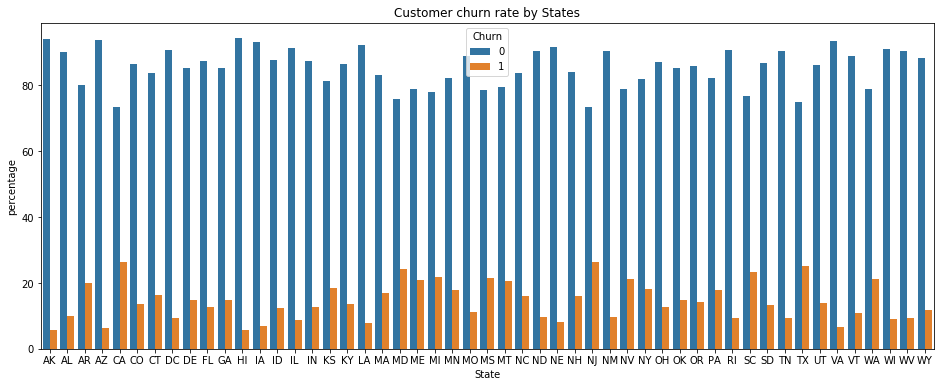

In [20]:
plt.figure(figsize=(16,6))
sns.barplot(x="State",y="percentage", hue="Churn",data=churn_rate)
plt.title("Customer churn rate by States")
plt.show()

# 6. Calculate the percentage of churn in your dataset to have some opinion on general accuracy you could benchmark without using any model (naive approach).

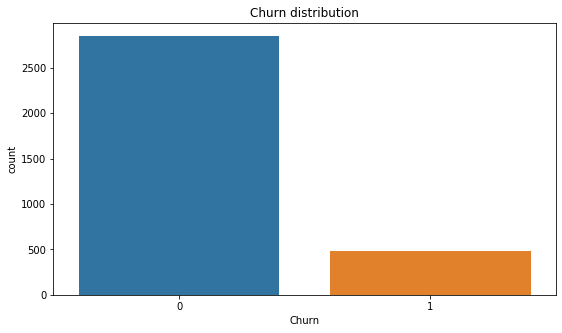

In [21]:
plt.figure(figsize=(9,5))
sns.countplot(data.Churn)
plt.title("Churn distribution")
plt.show()

In [21]:
#the benchmark for customer churn
data.Churn.value_counts(normalize=True).mul(100).rename("Churn percentage")

0    85.508551
1    14.491449
Name: Churn percentage, dtype: float64

#### Customer churn is not evenly balanced between 0s and 1s. As the countplot and value counts show, only about 14% of employees are leaving and ~85% are staying.So we can use this info as a naive assumption for newcomers to decide whether they'll leave or stay. In other words, if the resulting score is more than the noted value, then our model will be not bad, otherwise-a bad one.

#  7. Develop a logistic regression model which estimates the probability of churn as correctly as possible (you may do variable transformations).

## Model 1

In [22]:
data.columns.tolist()

['Account_Length',
 'VMail_Message',
 'Day_Mins',
 'Eve_Mins',
 'Night_Mins',
 'Intl_Mins',
 'CustServ_Calls',
 'Churn',
 "Int'l_Plan",
 'VMail_Plan',
 'Day_Calls',
 'Day_Charge',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Calls',
 'Night_Charge',
 'Intl_Calls',
 'Intl_Charge',
 'State',
 'Area_Code']

In [23]:
#dropping columns
data.drop(['Day_Mins','Eve_Mins','Night_Mins','Intl_Mins','Area_Code','VMail_Message','State'], axis=1,inplace=True)

In [24]:
#separating X and Y
Y=data["Churn"]
X=data.drop("Churn",axis=1)

In [25]:
#as we are going to use not formula but X and Y data in the logit function, 
#so we need to add the intercept to data (X) manually
X=sm.add_constant(X)

C:\Users\SONA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
#let's split X and Y data into test and train datasets, test data is 25% of overall data
#splitting the data into train and test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [27]:
#constructing the logit model
model=Logit(Y0,X0)
#fitting the model
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.324377
         Iterations 7


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2499
Model:                          Logit   Df Residuals:                     2486
Method:                           MLE   Df Model:                           12
Date:                Wed, 30 Oct 2019   Pseudo R-squ.:                  0.2104
Time:                        00:31:49   Log-Likelihood:                -810.62
converged:                       True   LL-Null:                       -1026.7
Covariance Type:            nonrobust   LLR p-value:                 5.930e-85
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.9670      0.834     -9.558      0.000      -9.601      -6.333
Account_Length     0.0006      0.002      0.355      0.723      -0.003       0.004
CustServ_Calls     0.5142      0.045     11.529      0.000       0.427       0.602
Int'l_Plan         2.1048      0.167     12.587      0.000       1.777       2.433
VMail_Plan        -0.8717      0.167     -5.212      0.000      -1.200      -0.544
Day_Calls          0.0005      0.003      0.148      0.883      -0.006       0.007
Day_Charge         0.0695      0.007      9.547      0.000       0.055       0.084
Eve_Calls          0.0018      0.003      0.566      0.571      -0.004       0.008
Eve_Charge         0.0767      0.015      4.966      0.000       0.046       0.107
Night_Calls        0.0006      0.003      0.167      0.867      -0.006       0.007
Night_Charge       0.0670      0.029      2.343      0.019       0.011       0.123
Intl_Calls        -0.1059      0.030     -3.540      0.000      -0.165      -0.047
Intl_Charge        0.3561      0.087      4.071      0.000       0.185       0.528
==================================================================================
"""

In [29]:
results.get_margeff().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  Churn
Method:                          dydx
At:                           overall
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Account_Length  5.671e-05      0.000      0.355      0.723      -0.000       0.000
CustServ_Calls     0.0501      0.004     12.270      0.000       0.042       0.058
Int'l_Plan         0.2049      0.015     13.915      0.000       0.176       0.234
VMail_Plan        -0.0849      0.016     -5.256      0.000      -0.116      -0.053
Day_Calls       4.541e-05      0.000      0.148      0.883      -0.001       0.001
Day_Charge         0.0068      0.001      9.904      0.000       0.005       0.008
Eve_Calls          0.0002      0.000      0.566      0.571      -0.000       0.001
Eve_Charge         0.0075      0.001      5.008      0.000       0.005       0.010
Night_Calls     5.362e-05      0.000      0.167      0.867      -0.001       0.001
Night_Charge       0.0065      0.003      2.347      0.019       0.001       0.012
Intl_Calls        -0.0103      0.003     -3.552      0.000      -0.016      -0.005
Intl_Charge        0.0347      0.008      4.100      0.000       0.018       0.051
==================================================================================
"""

In [30]:
#predicting for train and test data
Y1_logit=results.predict(sm.add_constant(X1))
Y0_logit=results.predict(X0)

In [31]:
#converting probabilities into labels
Y1_logit=np.where(Y1_logit>=0.5,1,0)
Y0_logit=np.where(Y0_logit>=0.5,1,0)

In [32]:
#Using confusion matrix for train and test data
cm_train=confusion_matrix(Y0,Y0_logit).T

In [33]:
#let's calculate overall accuracy, recall and specificity for train data
print("Accuracy_train:", (cm_train[0,0]+cm_train[1,1])/len(Y0))
print("Sensitivity_train:",cm_train[1,1]/(cm_train[1,1]+cm_train[1,0]))
print("Specificity_train:",cm_train[0,0]/(cm_train[0,0]+cm_train[0,1]))

Accuracy_train: 0.8639455782312925
Sensitivity_train: 0.5661764705882353
Specificity_train: 0.8810833685992383


In [34]:
#confusion matrix for the test data
cm_test=confusion_matrix(Y1,Y1_logit).T

In [35]:
#let's calculate overall accuracy, recall and specificity for train data
print("Accuracy_test:", (cm_test[0,0]+cm_test[1,1])/len(Y1))
print("Sensitivity_test:",cm_test[1,1]/(cm_test[1,1]+cm_test[1,0]))
print("Specificity_test:",cm_test[0,0]/(cm_test[0,0]+cm_test[0,1]))

Accuracy_test: 0.8609112709832134
Sensitivity_test: 0.6046511627906976
Specificity_test: 0.8748419721871049


In [36]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y0,Y0_logit))

print("Logistic Regression Test:")
print(classification_report(Y1,Y1_logit))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2141
           1       0.57      0.22      0.31       358

    accuracy                           0.86      2499
   macro avg       0.72      0.59      0.62      2499
weighted avg       0.84      0.86      0.84      2499

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.60      0.21      0.31       125

    accuracy                           0.86       834
   macro avg       0.74      0.59      0.62       834
weighted avg       0.83      0.86      0.83       834



In [79]:
#summarizing the results into a dataframe
results_summary=pd.DataFrame({"Accuracy":[accuracy_score(Y0,Y0_logit),accuracy_score(Y1,Y1_logit)],
                              "ROC_AUC":[roc_auc_score(Y0,Y0_logit),roc_auc_score(Y1, Y1_logit)],
                              "Recall":[recall_score(Y0, Y0_logit),recall_score(Y1, Y1_logit)]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall
Training set,0.863946,0.593763,0.215084
Testing set,0.860911,0.592011,0.208000


## Model 2    

In [38]:
# let's make some transformation 

In [39]:
data2=data=pd.read_excel("Telecom_Churn.xls")

In [40]:
data2.columns = data2.columns.str.replace(" ", "_")

In [41]:
# Let's ceate a single variable for Day_Charge,Eve_Charge,Night_Charge,Intl_Charge, so we will have one variable : total_charge
data2["Total_charge"]= data2["Day_Charge"]+ data2["Eve_Charge"]+ data2["Night_Charge"]+ data2["Intl_Charge"]


In [42]:
data2.drop(["Day_Charge","Eve_Charge","Night_Charge","Intl_Charge"], axis=1, inplace=True)

In [43]:
data2.drop(["Area_Code","State","Phone","VMail_Message"],axis=1, inplace=True)

In [44]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
Account_Length    3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l_Plan        3333 non-null int64
VMail_Plan        3333 non-null int64
Day_Calls         3333 non-null int64
Eve_Calls         3333 non-null int64
Night_Calls       3333 non-null int64
Intl_Calls        3333 non-null int64
Total_charge      3333 non-null float64
dtypes: float64(5), int64(9)
memory usage: 364.6 KB


In [45]:
#separating X and Y
Y_2=data2["Churn"]
X_2=data2.drop("Churn",axis=1)

In [46]:
#as we are going to use not formula but X and Y data in the logit function, 
#so we need to add the intercept to data (X) manually
X_2=sm.add_constant(X_2)

C:\Users\SONA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
#let's split X and Y data into test and train datasets, test data is 25% of overall data
#splitting the data into train and test sets
X_20, X_21, Y_20, Y_21 = train_test_split(X_2, Y_2, test_size=0.25, random_state=42)

In [48]:
#constructing the logit model
model2=Logit(Y_20,X_20)
#fitting the model
results2=model2.fit()

Optimization terminated successfully.
         Current function value: 0.324370
         Iterations 7


In [49]:
#predicting for train and test data
Y_21_logit=results2.predict(sm.add_constant(X_21))
Y_20_logit=results2.predict(X_20)

In [50]:
#converting probabilities into labels
Y_21_logit=np.where(Y_21_logit>=0.5,1,0)
Y_20_logit=np.where(Y_20_logit>=0.5,1,0)

In [51]:
#Using confusion matrix for train and test data
cm_train2=confusion_matrix(Y_20,Y_20_logit).T

In [52]:
#let's calculate overall accuracy, recall and specificity for train data
print("Accuracy_train:", (cm_train2[0,0]+cm_train2[1,1])/len(Y0))
print("Sensitivity_train:",cm_train2[1,1]/(cm_train2[1,1]+cm_train2[1,0]))
print("Specificity_train:",cm_train2[0,0]/(cm_train2[0,0]+cm_train2[0,1]))

Accuracy_train: 0.8639455782312925
Sensitivity_train: 0.5661764705882353
Specificity_train: 0.8810833685992383


In [53]:
#confusion matrix for the test data
cm_test2=confusion_matrix(Y_21,Y_21_logit).T

In [54]:
#let's calculate overall accuracy, recall and specificity for train data
print("Accuracy_test:", (cm_test2[0,0]+cm_test2[1,1])/len(Y1))
print("Sensitivity_test:",cm_test2[1,1]/(cm_test2[1,1]+cm_test2[1,0]))
print("Specificity_test:",cm_test2[0,0]/(cm_test2[0,0]+cm_test2[0,1]))

Accuracy_test: 0.8597122302158273
Sensitivity_test: 0.5952380952380952
Specificity_test: 0.8737373737373737


In [55]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y_20,Y_20_logit))

print("Logistic Regression Test:")
print(classification_report(Y_21,Y_21_logit))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2141
           1       0.57      0.22      0.31       358

    accuracy                           0.86      2499
   macro avg       0.72      0.59      0.62      2499
weighted avg       0.84      0.86      0.84      2499

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.60      0.20      0.30       125

    accuracy                           0.86       834
   macro avg       0.73      0.59      0.61       834
weighted avg       0.83      0.86      0.83       834



In [56]:
#summarizing the results into a dataframe
results_summary2=pd.DataFrame({"Accuracy":[accuracy_score(Y_20,Y_20_logit),accuracy_score(Y_21,Y_21_logit)],
                              "ROC_AUC":[roc_auc_score(Y_20,Y_20_logit),roc_auc_score(Y_21, Y_21_logit)],
                              "Recall":[recall_score(Y_20, Y_20_logit),recall_score(Y_21, Y_21_logit)]
                              },
                             index=["Training set","Testing set"])
results_summary2

,Accuracy,ROC_AUC,Recall
Training set,0.863946,0.593763,0.215084
Testing set,0.859712,0.588011,0.200000


# Model 3

In [57]:
# Let's make some transformation on data
# Let's ceate a single variable for Day_Calls,Eve_Calls,Night_Calls,Intl_Calls, so we will have one variable : total_calls
data["Total_calls"]= data["Day_Calls"]+ data["Eve_Calls"]+ data["Night_Calls"]+ data["Intl_Calls"]

In [58]:
data.drop(["Day_Calls","Eve_Calls","Night_Calls","Intl_Calls"],axis=1, inplace=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Account_Length    3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l_Plan        3333 non-null int64
VMail_Plan        3333 non-null int64
Total_charge      3333 non-null float64
Total_calls       3333 non-null int64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


In [60]:
#separating X and Y
Y_3=data["Churn"]
X_3=data.drop("Churn",axis=1)

In [61]:
#as we are going to use not formula but X and Y data in the logit function, 
#so we need to add the intercept to data (X) manually
X_3=sm.add_constant(X_3)

C:\Users\SONA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
#let's split X and Y data into test and train datasets, test data is 25% of overall data
#splitting the data into train and test sets
X_30, X_31, Y_30, Y_31 = train_test_split(X_3, Y_3, test_size=0.25, random_state=42)

In [63]:
#constructing the logit model
model3=Logit(Y_30,X_30)
#fitting the model
results3=model3.fit()

Optimization terminated successfully.
         Current function value: 0.327098
         Iterations 7


In [64]:
#predicting for train and test data
Y_31_logit=results3.predict(sm.add_constant(X_31))
Y_30_logit=results3.predict(X_30)

In [65]:
#converting probabilities into labels
Y_31_logit=np.where(Y_31_logit>=0.5,1,0)
Y_30_logit=np.where(Y_30_logit>=0.5,1,0)

In [66]:
#Using confusion matrix for train and test data
cm_train3=confusion_matrix(Y_30,Y_30_logit).T

In [67]:
#let's calculate overall accuracy, recall and specificity for train data
print("Accuracy_train:", (cm_train3[0,0]+cm_train3[1,1])/len(Y0))
print("Sensitivity_train:",cm_train3[1,1]/(cm_train3[1,1]+cm_train3[1,0]))
print("Specificity_train:",cm_train3[0,0]/(cm_train3[0,0]+cm_train3[0,1]))

Accuracy_train: 0.8615446178471389
Sensitivity_train: 0.5526315789473685
Specificity_train: 0.8763102725366876


In [68]:
#confusion matrix for the test data
cm_test3=confusion_matrix(Y_31,Y_31_logit).T

In [69]:
#let's calculate overall accuracy, recall and specificity for train data
print("Accuracy_test:", (cm_test3[0,0]+cm_test3[1,1])/len(Y1))
print("Sensitivity_test:",cm_test3[1,1]/(cm_test3[1,1]+cm_test3[1,0]))
print("Specificity_test:",cm_test3[0,0]/(cm_test3[0,0]+cm_test3[0,1]))

Accuracy_test: 0.8585131894484412
Sensitivity_test: 0.5945945945945946
Specificity_test: 0.8707653701380176


In [70]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y_30,Y_30_logit))

print("Logistic Regression Test:")
print(classification_report(Y_31,Y_31_logit))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2141
           1       0.55      0.18      0.27       358

    accuracy                           0.86      2499
   macro avg       0.71      0.58      0.60      2499
weighted avg       0.83      0.86      0.83      2499

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.59      0.18      0.27       125

    accuracy                           0.86       834
   macro avg       0.73      0.58      0.60       834
weighted avg       0.83      0.86      0.82       834



In [71]:
#summarizing the results into a dataframe
results_summary3=pd.DataFrame({"Accuracy":[accuracy_score(Y_30,Y_30_logit),accuracy_score(Y_31,Y_31_logit)],
                              "ROC_AUC":[roc_auc_score(Y_30,Y_30_logit),roc_auc_score(Y_31, Y_31_logit)],
                              "Recall":[recall_score(Y_30, Y_30_logit),recall_score(Y_31, Y_31_logit)]
                              },
                             index=["Training set","Testing set"])
results_summary3

,Accuracy,ROC_AUC,Recall
Training set,0.861545,0.576079,0.175978
Testing set,0.858513,0.577422,0.176000


# 9. Interpret the winner model (marginal effects of logistic regression)

## the winner model is Model 1 as its measures (Sensitivity, Specificity, ROC AUC) are higher on both Train and Test sets than those of others
## 1st and 2nd models have almost identical measures however recall in Test set is higher.

## The Main output Summary of Model 1

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2499
Model:                          Logit   Df Residuals:                     2486
Method:                           MLE   Df Model:                           12
Date:                Wed, 30 Oct 2019   Pseudo R-squ.:                  0.2104
Time:                        00:41:54   Log-Likelihood:                -810.62
converged:                       True   LL-Null:                       -1026.7
Covariance Type:            nonrobust   LLR p-value:                 5.930e-85
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.9670      0.834     -9.558      0.000      -9.601      -6.333
Account_Length     0.0006      0.002      0.355      0.723      -0.003       0.004
CustServ_Calls     0.5142      0.045     11.529      0.000       0.427       0.602
Int'l_Plan         2.1048      0.167     12.587      0.000       1.777       2.433
VMail_Plan        -0.8717      0.167     -5.212      0.000      -1.200      -0.544
Day_Calls          0.0005      0.003      0.148      0.883      -0.006       0.007
Day_Charge         0.0695      0.007      9.547      0.000       0.055       0.084
Eve_Calls          0.0018      0.003      0.566      0.571      -0.004       0.008
Eve_Charge         0.0767      0.015      4.966      0.000       0.046       0.107
Night_Calls        0.0006      0.003      0.167      0.867      -0.006       0.007
Night_Charge       0.0670      0.029      2.343      0.019       0.011       0.123
Intl_Calls        -0.1059      0.030     -3.540      0.000      -0.165      -0.047
Intl_Charge        0.3561      0.087      4.071      0.000       0.185       0.528
==================================================================================
"""

#### For a one-unit increase in CustServ_Calls we expect on average a 0.5142 increase in the log-odds of churn, holding all other independent variables constant.

#### For a one-unit increase in Day_Charge we expect on average a 0.0695 increase in the log-odds of churn, holding all other independent variables constant.

#### For a one-unit increase in Eve_Charge we expect on average a 0.0767 increase in the log-odds of churn, holding all other independent variables constant.

#### For a one-unit increase in Night_Charge we expect on average a 0.0670 increase in the log-odds of churn, holding all other independent variables constant.

#### For a one-unit increase in Intl_Calls we expect on average a 0.1059 decrease in the log-odds of churn, holding all other independent variables constant.

#### For a one-unit increase in Intl_Charge we expect on average a 0.3561 increase in the log-odds of churn, holding all other independent variables constant.

#### For customers with Int'l_Plan , we expect on average a 2.1048 increase in the log-odds of the dependent variable churn compared to the customers without Int'l_Plan .

#### For customers with VMail_Plan , we expect on average a 0.8717 decrease in the log-odds of the dependent variable churn compared to the customers without VMail_Plan .

### The Marginal Effects Summary of Model 1

In [74]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  Churn
Method:                          dydx
At:                           overall
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Account_Length  5.671e-05      0.000      0.355      0.723      -0.000       0.000
CustServ_Calls     0.0501      0.004     12.270      0.000       0.042       0.058
Int'l_Plan         0.2049      0.015     13.915      0.000       0.176       0.234
VMail_Plan        -0.0849      0.016     -5.256      0.000      -0.116      -0.053
Day_Calls       4.541e-05      0.000      0.148      0.883      -0.001       0.001
Day_Charge         0.0068      0.001      9.904      0.000       0.005       0.008
Eve_Calls          0.0002      0.000      0.566      0.571      -0.000       0.001
Eve_Charge         0.0075      0.001      5.008      0.000       0.005       0.010
Night_Calls     5.362e-05      0.000      0.167      0.867      -0.001       0.001
Night_Charge       0.0065      0.003      2.347      0.019       0.001       0.012
Intl_Calls        -0.0103      0.003     -3.552      0.000      -0.016      -0.005
Intl_Charge        0.0347      0.008      4.100      0.000       0.018       0.051
==================================================================================
"""

#### An Incremental increase in CustServ Calls will increase the probability of churn on average by 5,01% when other factors are held constant.
#### Customers who have Int'l_Plan have on average 20.49% higher probability of churn compared to customers who don't have.
#### Customers who have VMail_Plan have on average 8,49% lower probability of churn compared to customers who don't have.
#### An Incremental increase in Day_Charge will increase the probability of churn on average by 0.68% when other factors are held constant.
#### An Incremental increase in Eve Charge will increase the probability of churn on average by 0.2% when other factors are held constant.
#### An Incremental increase in Night Charge will increase the probability of churn on average by 0.65% when other factors are held constant.
#### An Incremental increase in Intl Calls will decrease the probability of churn on average by 1.03% when other factors are held constant.
#### An Incremental increase in Intl Charge will increase the probability of churn on average by 3.47% when other factors are held constant.

In [80]:
#summarizing the results into a dataframe
results_summary=pd.DataFrame({"Accuracy":[accuracy_score(Y0,Y0_logit),accuracy_score(Y1,Y1_logit)],
                              "ROC_AUC":[roc_auc_score(Y0,Y0_logit),roc_auc_score(Y1, Y1_logit)],
                              "Recall":[recall_score(Y0, Y0_logit),recall_score(Y1, Y1_logit)]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall
Training set,0.863946,0.593763,0.215084
Testing set,0.860911,0.592011,0.208000


#### as we see,Model 1 has very little variance between Train and Test measures. Also we can note the difference between accuracy and ROC AUC score: Accuracy is much higher than ROC AUC, conditioned by not balanced data. ROC AUC score is lower as it is based on all levels of thresholds (not just 0.5), and takes into account both recall and specificity score values.

In [82]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y0,Y0_logit))

print("Logistic Regression Test:")
print(classification_report(Y1,Y1_logit))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2141
           1       0.57      0.22      0.31       358

    accuracy                           0.86      2499
   macro avg       0.72      0.59      0.62      2499
weighted avg       0.84      0.86      0.84      2499

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.60      0.21      0.31       125

    accuracy                           0.86       834
   macro avg       0.74      0.59      0.62       834
weighted avg       0.83      0.86      0.83       834



####  As we can see  although the Model 1 measures are good for 0s, they are not doing a good job when predicting 1s. This may be a problem of unbalanced data, not using cross-validation and hyperparameter tuning.